<a href="https://colab.research.google.com/github/minhvvan/DeepLearning/blob/main/SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:
import numpy as np
from tensorflow.keras.datasets import imdb

(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=1000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [4]:
for i in range(len(x_train_all)):
  x_train_all[i] = [w for w in x_train_all[i] if w > 2]

print(x_train_all[0])

[22, 43, 530, 973, 65, 458, 66, 173, 36, 256, 25, 100, 43, 838, 112, 50, 670, 35, 480, 284, 150, 172, 112, 167, 336, 385, 39, 172, 546, 38, 447, 192, 50, 147, 22, 469, 22, 71, 87, 43, 530, 38, 76, 22, 515, 626, 62, 386, 316, 106, 480, 66, 33, 130, 38, 619, 25, 124, 51, 36, 135, 48, 25, 33, 22, 215, 28, 77, 52, 407, 82, 107, 117, 256, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 104, 88, 381, 297, 98, 32, 56, 26, 141, 194, 226, 22, 21, 134, 476, 26, 480, 144, 30, 51, 36, 28, 224, 92, 25, 104, 226, 65, 38, 88, 283, 113, 103, 32, 178, 32]


In [5]:
word_to_index = imdb.get_word_index()
word_to_index['movie']

17

In [6]:
index_to_word = {word_to_index[k]: k for k in word_to_index}

for w in x_train_all[0]:
  print(index_to_word[w - 3], end=' ')

film just brilliant casting story direction really part they played you could just imagine being there robert an amazing actor now same being director father came from same myself so loved fact there real film throughout film were great just brilliant so much film soon released would recommend everyone watch amazing really at end so sad you know what they say if you at film must have been good definitely also two little played paul they were just brilliant children are often left out think because stars play them all up are such big whole film but these children are amazing should be what they have done don't you think whole story so because true life after all us all 

In [7]:
np.random.seed(42)
random_index = np.random.permutation(25000)

x_train = x_train_all[[random_index[:20000]]]
y_train = y_train_all[[random_index[:20000]]]
x_val = x_train_all[[random_index[20000:]]]
y_val = y_train_all[[random_index[20000:]]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which 

In [8]:
from tensorflow.keras.preprocessing import sequence

maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [9]:
# model = Sequential()
# model.add(SimpleRNN(32, input_shape=(100, 100)))
# model.add(Dense(1, activation='sigmoid'))

# model.summary()

In [10]:
from tensorflow.keras.layers import  Embedding

model2 = Sequential()
model2.add(Embedding(1000, 32))
model2.add(SimpleRNN(8))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 8)                 328       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 32,337
Trainable params: 32,337
Non-trainable params: 0
_________________________________________________________________


In [11]:
# model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
# history = model.fit(x_train_onehot, y_train, epochs=20, batch_size=32, validation_data=(x_val_onehot, y_val))

In [12]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history2 = model2.fit(x_train_seq, y_train, epochs=10, batch_size=32, validation_data=(x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 13s 19ms/step - loss: 0.6806 - accuracy: 0.5449 - val_loss: 0.5553 - val_accuracy: 0.7334
Epoch 2/10
625/625 [==============================] - 11s 17ms/step - loss: 0.4683 - accuracy: 0.7859 - val_loss: 0.4862 - val_accuracy: 0.7742
Epoch 3/10
625/625 [==============================] - 11s 18ms/step - loss: 0.4014 - accuracy: 0.8273 - val_loss: 0.4607 - val_accuracy: 0.7974
Epoch 4/10
625/625 [==============================] - 11s 17ms/step - loss: 0.3448 - accuracy: 0.8600 - val_loss: 0.4330 - val_accuracy: 0.8190
Epoch 5/10
625/625 [==============================] - 10s 17ms/step - loss: 0.2858 - accuracy: 0.8901 - val_loss: 0.4585 - val_accuracy: 0.8138
Epoch 6/10
625/625 [==============================] - 10s 17ms/step - loss: 0.2614 - accuracy: 0.8997 - val_loss: 0.4622 - val_accuracy: 0.8056
Epoch 7/10
625/625 [==============================] - 10s 17ms/step - loss: 0.2385 - accuracy: 0.9084 - val_loss: 0.4873 - val_accuracy:

In [13]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.legend(['loss','val_loss'])
# plt.show()

In [14]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.legend(['accuracy','val_accuracy'])
# plt.show()

In [15]:
# loss, accuracy = model.evaluate(x_val_onehot, y_val, verbose=0)
# print(accuracy)

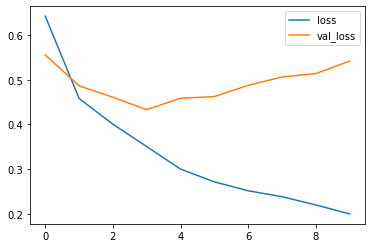

In [16]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

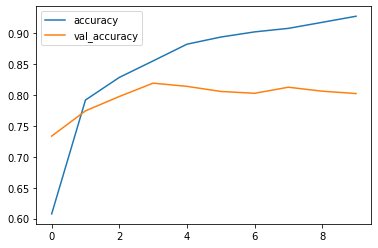

In [17]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()

In [18]:
loss, accuracy = model2.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)

0.8022000193595886
